In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv
!head spam.csv

--2021-10-27 10:27:55--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  2.05MB/s    in 0.2s    

2021-10-27 10:27:55 (2.05 MB/s) - ‘spam.csv’ saved [503663/503663]

v1,v2,,,
ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,
ham,Ok lar... Joking wif u oni...,,,
spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,
ham,U dun say so early hor... U c already then say...,,,
ham,"Nah I don't think he goes to usf, he lives around here though",,,
spam,"FreeMsg Hey 

In [ ]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.columns = ['labels', 'data']
df['b_labels'] = df['labels'].map({'ham':0, 'spam':1})
df.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
Y = df['b_labels'].values
X = df['data'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

print('Example of sentences:')
X_train[0:5]

X_train shape: (3733,)
Y_train shape: (3733,)
X_test shape: (1839,)
Y_test shape: (1839,)
Example of sentences:


array(["ree entry in 2 a weekly comp for a chance to win an ipod. Txt POD to 80182 to get entry (std txt rate) T&C's apply 08452810073 for details 18+",
       'Ur HMV Quiz cash-balance is currently å£500 - to maximize ur cash-in now send HMV1 to 86688 only 150p/msg',
       'Was gr8 to see that message. So when r u leaving? Congrats dear. What school and wat r ur plans.',
       "Also remember the beads don't come off. Ever.",
       'How long does it take to get it.'], dtype=object)

In [ ]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
X_train_tokenized = tokenizer.texts_to_sequences(X_train)
X_test_tokenized = tokenizer.texts_to_sequences(X_test)

X_train_tokenized[0:2]

[[3370,
  413,
  8,
  20,
  4,
  518,
  810,
  12,
  4,
  348,
  2,
  192,
  128,
  811,
  72,
  1761,
  2,
  1762,
  2,
  37,
  413,
  1267,
  72,
  489,
  177,
  812,
  460,
  1763,
  12,
  608,
  262],
 [35,
  970,
  750,
  161,
  1268,
  9,
  971,
  547,
  2,
  1454,
  35,
  161,
  8,
  22,
  69,
  3371,
  2,
  548,
  65,
  170,
  129]]

In [ ]:
# get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 7228 unique tokens.


In [ ]:
X_train_padded = pad_sequences(X_train_tokenized, padding='pre')
T = X_train_padded.shape[1]
print('Shape of X_train_padded:', X_train_padded.shape)
print('Seqence length T:', T)
X_test_padded = pad_sequences(X_test_tokenized, maxlen=T, padding='pre', truncating='pre')

X_train_padded[0:2]

Shape of X_train_padded: (3733, 162)
Seqence length T: 162


array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 3370,
         413,    8,   20,    4,  518,  810,   12,    4,  348,    2,  192,
         128,  811,   72, 1761,    2, 

In [ ]:
D = 20

i = Input((T,))
x = Embedding(V + 1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_padded, Y_train, validation_data=(X_test_padded, Y_test), epochs=10)

Epoch 1/10
117/117 [==============================] - 3s 20ms/step - loss: 0.3883 - accuracy: 0.8645 - val_loss: 0.2929 - val_accuracy: 0.8537
Epoch 2/10
117/117 [==============================] - 2s 18ms/step - loss: 0.1102 - accuracy: 0.9518 - val_loss: 0.0905 - val_accuracy: 0.9734
Epoch 3/10
117/117 [==============================] - 2s 18ms/step - loss: 0.0182 - accuracy: 0.9941 - val_loss: 0.1055 - val_accuracy: 0.9750
Epoch 4/10
117/117 [==============================] - 2s 19ms/step - loss: 0.0041 - accuracy: 0.9997 - val_loss: 0.0695 - val_accuracy: 0.9837
Epoch 5/10
117/117 [==============================] - 2s 20ms/step - loss: 0.0019 - accuracy: 0.9997 - val_loss: 0.0821 - val_accuracy: 0.9837
Epoch 6/10
117/117 [==============================] - 2s 20ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0843 - val_accuracy: 0.9837
Epoch 7/10
117/117 [==============================] - 2s 20ms/step - loss: 9.7635e-04 - accuracy: 0.9997 - val_loss: 0.0839 - val_accuracy: 0.

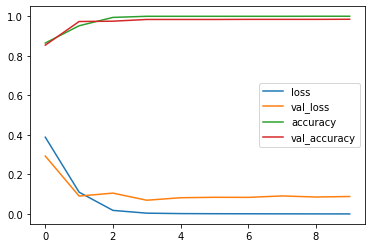

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()